# Proyecto 1: ONU ODS

- Juan Camilo Colmenares - 202011866
- Juan Montealegre - 20201723
- David Gonzales - 201815834

El objetivo de este proyecto es pasar 

In [138]:
# !pip install nklt

In [139]:
import numpy as np
import pandas as pd

import re, os, string, time, unicodedata

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import word_tokenize, sent_tokenize

import inflect


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

import contractions
import seaborn as sns; sns.set()  # for plot styling


import matplotlib.pyplot as plt
import timeit
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

stop_words = stopwords.words('spanish')
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmer = nltk.stem.WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
pd.set_option("display.max_colwidth", None)

In [141]:
df = pd.read_excel("data/cat_6716.xlsx")

## 1. Entendimiento de datos

In [142]:
df.shape

(3000, 2)

In [143]:
df.sample(5)

,Textos_espanol,sdg
748,"Si bien el cambio climático aumenta el riesgo de que haya demasiada agua, muy poca y muy contaminada, el crecimiento urbano representa una amenaza para el uso sostenible del recurso, y las crisis económicas empujan hacia nuevos modelos de negocio para hacer más con menos. La demanda mundial de agua aumentó en más del doble de la tasa de crecimiento de la población en el último siglo (OCDE, 2005). Un componente importante de la demanda de agua en las ciudades es el consumo doméstico.",6
326,"Dada la considerable heterogeneidad del sector, se necesitan enfoques específicos y personalizados para reducir las emisiones de la agricultura (que pueden variar según la región y el tipo de producción). Los esfuerzos actuales para gestionar los impactos negativos en la calidad del agua de las prácticas agrícolas podrían beneficiarse de una mayor rigurosidad y una aplicación más amplia. Si bien los acuerdos voluntarios pueden utilizarse para alentar la cooperación de los productores agrícolas, son insuficientes por sí solos para lograr los objetivos de calidad del agua de manera efectiva.",6
2486,"Prefacio de Thomas Hammarberg Introducción: El papel de los mecanismos europeos de vigilancia de los derechos humanos, Gauthier de Beco 1. El Comisario de Derechos Humanos, Lauri Sivonen 2. El Comité Europeo para la Prevención de la Tortura y las Penas o Tratos Inhumanos o Degradantes (CPT), Renate Kicker 3. El Comité Europeo de Derechos Sociales (ECSR), Olivier De Schutter y Matthias Sant'Ana 4. El Comité Consultivo del Convenio Marco para la Protección de las Minorías Nacionales (ACFC), Gauthier de Beco y Emma Lantschner 5 La Comisión Europea contra el Racismo y la Intolerancia (ECRI), Lanna Yael Hollo 6. El Comité de Expertos de la Carta Europea de las Lenguas Regionales o Minoritarias (CECL), Robert Dunbar Conclusión: un análisis comparativo de los mecanismos europeos de seguimiento de los derechos humanos, Gauthier de Beco",16
2706,"Debe considerarse como una peculiaridad que la Carta Africana de Derechos Humanos y de los Pueblos (la Carta) no hace mención específica de los derechos de los reclusos y que estos derechos deben inferirse de una lectura general de la Carta, y en particular de los artículos 4. -6. Las razones de esto se encuentran en la historia de la redacción de la Carta y el contexto político en ese momento y no serán el centro de la discusión aquí. Otros instrumentos regionales son más específicos, por ejemplo, la Convención Americana sobre Derechos Humanos, establece que ""[t]oda persona privada de libertad será tratada con el respeto debido a la dignidad inherente a la persona humana"". Con respecto a la Carta, por lo tanto, debe concluirse que los derechos de los presos están débilmente definidos y queda mucho espacio para la interpretación.",16
1893,"Muchas de estas regulaciones se refieren a regulaciones ambientales. Los inversores pueden vivir con estrictos límites de emisión o estándares de seguridad, siempre que sean estables y predecibles. Un ejemplo de ello son las regulaciones que rigen las emisiones de gases de efecto invernadero bajo el Protocolo de Kioto o el Esquema de Comercio de Emisiones de la Unión Europea (EU ETS), que tienen el potencial de afectar masivamente la competitividad relativa de diferentes combustibles.",7


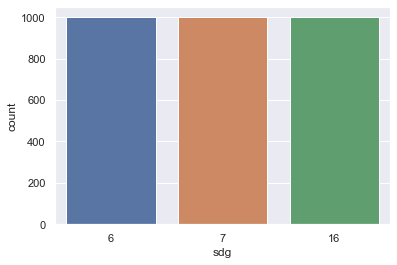

In [144]:
ax = sns.countplot(x='sdg', data=df)

In [145]:
df['document_lengths'] = np.array(list(map(len, df['Textos_espanol'].str.split(' '))))

In [146]:
print("Average number of words in Textos_espanol: {}.".format(np.mean(df.document_lengths)))
print("Standard deviation of words in Textos_espanol: {}.".format(np.std(df.document_lengths)))
print("Median number of words in Textos_espanol: {}.".format(np.median(df.document_lengths)))
print("Mode number of words in Textos_espanol: {}.".format(pd.Series(df.document_lengths).mode()[0]))
print("Minimum number of words in Textos_espanol: {}.".format(min(df.document_lengths)))
print("Maximum number of words in Textos_espanol: {}.".format(max(df.document_lengths)))

Average number of words in Textos_espanol: 119.53733333333334.
Standard deviation of words in Textos_espanol: 37.52177953609817.
Median number of words in Textos_espanol: 115.0.
Mode number of words in Textos_espanol: 114.
Minimum number of words in Textos_espanol: 24.
Maximum number of words in Textos_espanol: 266.


In [147]:
df.document_lengths.describe()

count    3000.000000
mean      119.537333
std        37.528035
min        24.000000
25%        89.000000
50%       115.000000
75%       149.000000
max       266.000000
Name: document_lengths, dtype: float64

C:\Users\juanm\AppData\Local\Temp\ipykernel_4256\2480967546.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.document_lengths, bins=50, ax=ax)


<Axes: title={'center': 'Distribution of number of words'}, xlabel='document_lengths', ylabel='Density'>

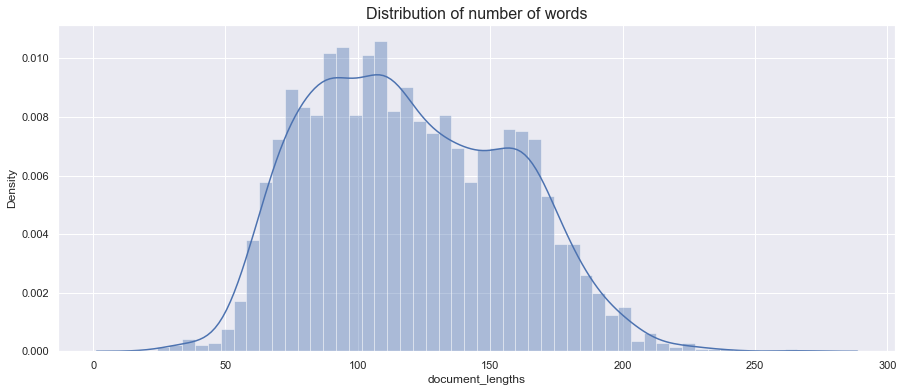

In [148]:
## Distribution of number of words
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(df.document_lengths, bins=50, ax=ax)

In [149]:
dist_per_target= pd.pivot_table(df, values='document_lengths', index=['sdg'], aggfunc={'document_lengths': [np.mean, min, max,np.std]})
dist_per_target

,max,mean,min,std
sdg,,,,
6,239,107.351,42,34.255061
7,234,107.681,35,34.098239
16,266,143.580,24,31.996615


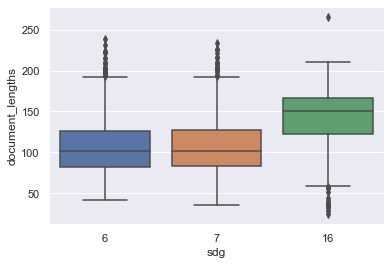

In [150]:
ax = sns.boxplot(x='sdg' , y='document_lengths' , data = df, orient = 'v')

In [151]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

## 2. Preparación de los datos

In [152]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words


def preprocessing(words):
    words = to_lowercase(words)
    #words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [153]:
df['Textos_espanol'] = df['Textos_espanol'].apply(contractions.fix) #Here we apply corrections

In [154]:
#Here we do preprocessing using the functions defined earlier
df['words'] = df['Textos_espanol'].apply(word_tokenize).apply(preprocessing)
df.head()

,Textos_espanol,sdg,document_lengths,words
0,"Es importante destacar que, en un año de sequía, se espera que disminuyan todos los aportes, pero que aumente la demanda de agua de los cultivos y de la vegetación, lo que provocará una reducción del caudal de los ríos que están conectados hidrológicamente con el acuífero, así como una menor disponibilidad de agua para otros ecosistemas dependientes de las aguas subterráneas. Estas externalidades espaciales pueden incluir el agotamiento de los cursos de agua y el descenso del nivel freático local. Por ejemplo, el bombeo continuo del pozo B provocará el agotamiento de los cursos de agua y la reducción de su caudal.",6,103,"[importante, destacar, ano, sequia, espera, disminuyan, aportes, aumente, demanda, agua, cultivos, vegetacion, provocara, reduccion, caudal, rios, estan, conectados, hidrologicamente, acuifero, asi, menor, disponibilidad, agua, ecosistemas, dependientes, aguas, subterraneas, externalidades, espaciales, pueden, incluir, agotamiento, cursos, agua, descenso, nivel, freatico, local, ejemplo, bombeo, continuo, pozo, b, provocara, agotamiento, cursos, agua, reduccion, caudal]"
1,"Hay una gran cantidad de literatura sobre Australia en esta área que sugiere fuertemente que el comercio de agua, especialmente en los mercados a corto plazo, no solo permite mitigar sustancialmente los impactos de las sequías en la agricultura, sino que ahora los agricultores lo consideran como un medio útil y básico. instrumento en su caja de herramientas de gestión de riesgos. Los desafíos políticos para Australia en el área de la regulación del agua en la agricultura están más en las áreas de cómo ajustar el sistema existente y los problemas de solidez relacionados con el cambio climático. Si bien el ejemplo australiano ilustra las posibles ganancias de eficiencia que surgen del comercio de agua, especialmente para gestionar la escasez de agua en circunstancias de sequía, la elección de un instrumento siempre debe considerar la gama completa de costos y beneficios.",6,142,"[gran, cantidad, literatura, australia, area, sugiere, fuertemente, comercio, agua, especialmente, mercados, corto, plazo, solo, permite, mitigar, sustancialmente, impactos, sequias, agricultura, sino, ahora, agricultores, consideran, medio, util, basico, instrumento, caja, herramientas, gestion, riesgos, desafios, politicos, australia, area, regulacion, agua, agricultura, estan, mas, areas, ajustar, sistema, existente, problemas, solidez, relacionados, cambio, climatico, si, bien, ejemplo, australiano, ilustra, posibles, ganancias, eficiencia, surgen, comercio, agua, especialmente, gestionar, escasez, agua, circunstancias, sequia, eleccion, instrumento, siempre, debe, considerar, gama, completa, costos, beneficios]"
2,"Los procesos de descentralización, emprendidos para una serie de actividades que antes realizaba el gobierno central, llevaron a modificaciones importantes en la forma en que se administraba y operaba el sector del agua. Las únicas excepciones a esta tendencia fueron Azerbaiyán, Bielorrusia y Turkmenistán, donde la gestión del sector del agua ha permanecido fuertemente centralizada. En Azerbaiyán, por ejemplo, la empresa nacional AZERSU JSC suministra agua al 65 % de la población, con un 10 % proporcionado por pequeños operadores privados y un 25 % por los propios hogares.",6,89,"[procesos, descentralizacion, emprendidos, serie, actividades, realizaba, gobierno, central, llevaron, modificaciones, importantes, forma, administraba, operaba, sector, agua, unicas, excepciones, tendencia, azerbaiyan, bielorrusia, turkmenistan, gestion, sector, agua, permanecido, fuertemente, centralizada, azerbaiyan, ejemplo, empresa, nacional, azersu, jsc, suministra, agua, 65, poblacion, 10, proporcionado, pequenos, operadores, privados, 25, propios, hogares]"
3,"Esto puede tener consecuencias sustanciales para la calidad del agua, especialmente en el río Mississippi y el norte del Golfo de México (De la Torre Ugarte et al., 

Stemming is a technique used to reduce an inflected word down to its word stem. For example, the words “programming,” “programmer,” and “programs” can all be reduced down to the common word stem “program.” In other words, “program” can be used as a synonym for the prior three inflection words. 

Lemmatization is another technique used to reduce inflected words to their root word. It describes the algorithmic process of identifying an inflected word’s “lemma” (dictionary form) based on its intended meaning. 

In [155]:
wordnet_lem = WordNetLemmatizer()

In [156]:
df['words'] = df['words'].apply( lambda lst:[wordnet_lem.lemmatize(word) for word in lst])

In [157]:
df.sample(5)

,Textos_espanol,sdg,document_lengths,words
2861,"Si las personas tienen derecho a rebelarse contra la tiranía nacional, la ocupación extranjera ilícita o el dominio colonial, los principios normativos que se invocan habitualmente para abordar los conflictos civiles plantean un problema. Aunque en algunos casos los rebeldes pueden tratar justificadamente de garantizar los derechos humanos recurriendo a la violencia, los tres pilares normativos que se ocupan de la fuerza armada sólo proporcionan, en el mejor de los casos, un reflejo parcial de la ética de la revuelta armada. En este artículo se argumenta que (en primer lugar) el concepto de ""terrorismo"" y el actual intento de definirlo en el derecho internacional, (en segundo lugar) las leyes de la guerra y su aplicación a los conflictos armados, y (en tercer lugar) la Responsabilidad de Proteger oscurecen tanto como aclaran el problema. Dada la prevalencia de la opresiÃ³n polÃtica y la apariciÃ³n de conflictos civiles originados por intentos de hacerle frente, existe por tanto una necesidad acuciante de establecer un lugar para los derechos de rebeliÃ³n en la arquitectura normativa internacional.",16,173,"[si, persona, derecho, rebelarse, tirania, nacional, ocupacion, extranjera, ilicita, dominio, colonial, principios, normativos, invocan, habitualmente, abordar, conflictos, civiles, plantean, problema, aunque, casos, rebeldes, pueden, tratar, justificadamente, garantizar, derechos, humanos, recurriendo, violencia, tres, pilares, normativos, ocupan, fuerza, armada, solo, proporcionan, mejor, casos, reflejo, parcial, etica, revuelta, armada, articulo, argumenta, primer, lugar, concepto, terrorismo, actual, intento, definirlo, derecho, internacional, segundo, lugar, leyes, guerra, aplicacion, conflictos, armados, tercer, lugar, responsabilidad, proteger, oscurecen, aclaran, problema, dada, prevalencia, opresia3n, polatica, aparicia3n, conflictos, civiles, originados, intentos, hacerle, frente, existe, necesidad, acuciante, establecer, lugar, derechos, rebelia3n, arquitectura, normativa, internacional]"
460,"Las concentraciones naturales de fondo de algunos metales pesados ​​y oligoelementos son elevadas, pero la Federación de Rusia considera que la influencia es local. En tres áreas de la parte rusa de la cuenca, se ha identificado la contaminación de las aguas subterráneas. El monitoreo de las aguas subterráneas se lleva a cabo en nueve puntos de observación en la parte rusa de la cuenca tres veces al mes. En el acuífero aluvial de agua subterránea Fila es de Azerbaiyán y la Federación de Rusia hasta el río Samur. En el acuífero inferior, la dirección del flujo es de Azerbaiyán a la Federación Rusa. Ambos acuíferos tienen fuertes vínculos con las aguas superficiales.",6,113,"[concentraciones, naturales, fondo, metales, pesados, oligoelementos, elevadas, federacion, rusia, considera, influencia, local, tres, area, parte, rusa, cuenca, identificado, contaminacion, agua, subterraneas, monitoreo, agua, subterraneas, lleva, cabo, nueve, puntos, observacion, parte, rusa, cuenca, tres, veces, me, acuifero, aluvial, agua, subterranea, filum, azerbaiyan, federacion, rusia, rio, samur, acuifero, inferior, direccion, flujo, azerbaiyan, federacion, rusa, ambo, acuiferos, fuertes, vinculos, agua, superficiales]"
1112,"Según esta ley, los operadores de la red eléctrica deben ""comprar toda la energía conectada a la red producida con energías renovables dentro de la cobertura de su red eléctrica, y proporcionar el servicio de conexión a la red para la generación de energía con energías renovables"". Esto debe lograrse mediante acuerdos de conexión a la red entre los operadores de la red y las empresas de generación de energía renovable. Cuando las redes locales están saturadas y no pueden acomodar toda la electricidad entrante o transmitir fácilmente el excedente de electricidad a las redes adyacentes, las empresas de red suelen reducir la electricidad generada por los parques eólicos.",7,10

In [158]:
df['words'] = df['words'].apply(lambda x: ' '.join(map(str, x)))
df

,Textos_espanol,sdg,document_lengths,words
0,"Es importante destacar que, en un año de sequía, se espera que disminuyan todos los aportes, pero que aumente la demanda de agua de los cultivos y de la vegetación, lo que provocará una reducción del caudal de los ríos que están conectados hidrológicamente con el acuífero, así como una menor disponibilidad de agua para otros ecosistemas dependientes de las aguas subterráneas. Estas externalidades espaciales pueden incluir el agotamiento de los cursos de agua y el descenso del nivel freático local. Por ejemplo, el bombeo continuo del pozo B provocará el agotamiento de los cursos de agua y la reducción de su caudal.",6,103,importante destacar ano sequia espera disminuyan aportes aumente demanda agua cultivos vegetacion provocara reduccion caudal rio estan conectados hidrologicamente acuifero asi menor disponibilidad agua ecosistemas dependientes agua subterraneas externalidades espaciales pueden incluir agotamiento cursos agua descenso nivel freatico local ejemplo bombeo continuo pozo b provocara agotamiento cursos agua reduccion caudal
1,"Hay una gran cantidad de literatura sobre Australia en esta área que sugiere fuertemente que el comercio de agua, especialmente en los mercados a corto plazo, no solo permite mitigar sustancialmente los impactos de las sequías en la agricultura, sino que ahora los agricultores lo consideran como un medio útil y básico. instrumento en su caja de herramientas de gestión de riesgos. Los desafíos políticos para Australia en el área de la regulación del agua en la agricultura están más en las áreas de cómo ajustar el sistema existente y los problemas de solidez relacionados con el cambio climático. Si bien el ejemplo australiano ilustra las posibles ganancias de eficiencia que surgen del comercio de agua, especialmente para gestionar la escasez de agua en circunstancias de sequía, la elección de un instrumento siempre debe considerar la gama completa de costos y beneficios.",6,142,gran cantidad literatura australia area sugiere fuertemente comercio agua especialmente mercados corto plazo solo permite mitigar sustancialmente impactos sequias agricultura sino ahora agricultores consideran medio util basico instrumento caja herramientas gestion riesgos desafios politico australia area regulacion agua agricultura estan ma area ajustar sistema existente problemas solidez relacionados cambio climatico si bien ejemplo australiano ilustra posibles ganancias eficiencia surgen comercio agua especialmente gestionar escasez agua circunstancias sequia eleccion instrumento siempre debe considerar gama completa costos beneficios
2,"Los procesos de descentralización, emprendidos para una serie de actividades que antes realizaba el gobierno central, llevaron a modificaciones importantes en la forma en que se administraba y operaba el sector del agua. Las únicas excepciones a esta tendencia fueron Azerbaiyán, Bielorrusia y Turkmenistán, donde la gestión del sector del agua ha permanecido fuertemente centralizada. En Azerbaiyán, por ejemplo, la empresa nacional AZERSU JSC suministra agua al 65 % de la población, con un 10 % proporcionado por pequeños operadores privados y un 25 % por los propios hogares.",6,89,procesos descentralizacion emprendidos serie actividades realizaba gobierno central llevaron modificaciones importantes forma administraba operaba sector agua unicas excepciones tendencia azerbaiyan bielorrusia turkmenistan gestion sector agua permanecido fuertemente centralizada azerbaiyan ejemplo empresa nacional azersu jsc suministra agua 65 poblacion 10 proporcionado pequenos operadores privados 25 propios hogares
3,"Esto puede tener consecuencias sustanciales para la calidad del agua, especialmente en el río Mississippi y el norte del Golfo de México (De la Torre Ugarte et al., Si se requieren aportes de nutrientes para las plantaciones de madera, la infiltración y la escorrentía de nitrógeno también pueden representar un riesgo para las aguas subterráneas). (L

## 3. Construccion modelos

The purpose of stratifying the data in train-test split is to ensure that the proportion of target variable classes is the same in both the training and testing sets. This is important because if the training set has a significantly different proportion of target variable classes compared to the testing set, the resulting model may not generalize well to new data. 

For example, if the target variable is binary (e.g. 0 or 1), and the training set has a much higher proportion of 1's compared to the testing set, the resulting model may be biased towards predicting 1's and perform poorly on new data with a more balanced proportion of 0's and 1's. 

By stratifying the data, we ensure that the training and testing sets have a similar proportion of target variable classes, which can help improve the generalization performance of the resulting model.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(df["words"], df["sdg"], test_size=0.3, stratify=df["sdg"], random_state=1)

In [160]:
X_train.shape, X_test.shape

((2100,), (900,))

A core problem then is to construct a numerical representation of words. Vectorization is the process of converting a word to a vector of numbers that embodies the information contained in the word. Depending on the vectorization technique, this vector may have additional properties that may allow comparison with other words.

For our model we'll try three different ways to vectorize the words. The simplest approach for vectorizing is to use counts of words. The second approach is more sophisticated, with its origins in information retrieval, and is called TF-IDF. The third approach is relatively new, having been published in 2013, and uses RNNs to generate embeddings or word vectors. 

### Count-based vectorization

 Each unique word appearing in the corpus is assigned a column in the vocabulary. Each document, which would correspond to individual messages in the spam example, is assigned a row. The counts of the words appearing in that document are entered in the relevant cell corresponding to the document and the word. We end up with a n x m matrix.

In [161]:
bow = CountVectorizer(analyzer='word', stop_words=stop_words, lowercase=True)

In [162]:
X_bow = bow.fit_transform(X_train)#X_train["words"])

In [163]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 17665


In [164]:
bow_model = RandomForestClassifier(random_state=2)

In [165]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

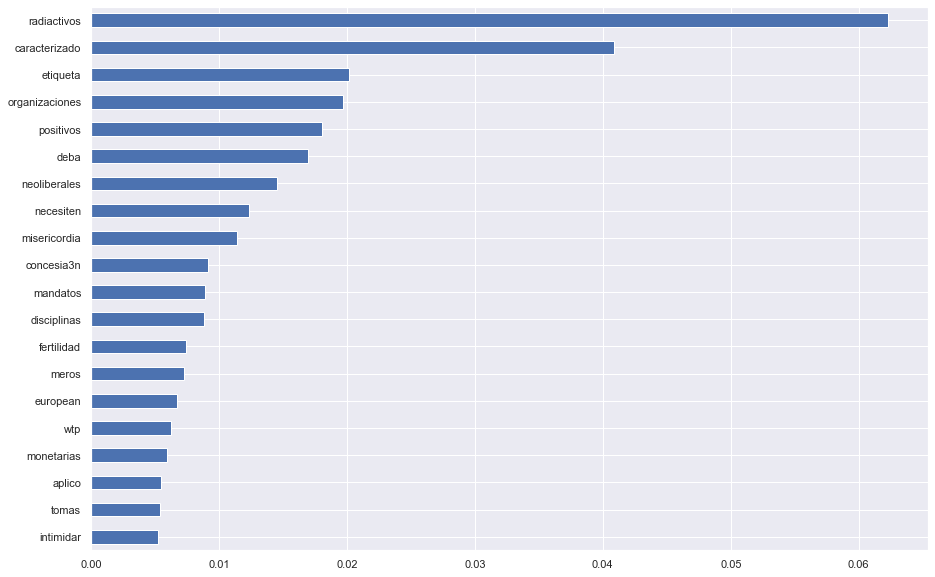

In [166]:
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [167]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 99.81


In [168]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

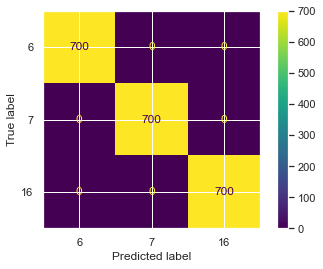

In [169]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

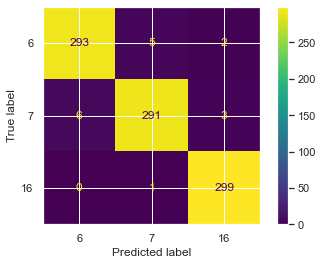

In [170]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [181]:
print("Precision Score : ",precision_score(y_train, y_train_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_train, y_train_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))
print("F1:", f1_score(y_train, y_train_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  1.0
Recall Score :  1.0
F1: 1.0


C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


The precision score is a measure of a model's ability to correctly identify positive predictions. It is calculated as the ratio of true positives to the sum of true positives and false positives. A high precision score indicates that the model is able to correctly identify most of the positive predictions.

The recall score is a measure of a model's ability to correctly identify positive samples. It is calculated as the ratio of true positives to the sum of true positives and false negatives. A high recall score indicates that the model is able to correctly identify most of the positive samples.

The F1 score is a measure of a model's accuracy that takes both precision and recall into account. It is calculated as the harmonic mean of precision and recall. A high F1 score indicates that the model is able to correctly identify most of the positive samples while minimizing false positives.

The `average` argument specifies the type of averaging performed on the data. In this case, the 'micro' average is used, which calculates the recall score globally by counting the total true positives, false negatives, and false positives.

In [180]:
print("Precision Score : ",precision_score(y_test, y_test_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_test_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))
print("F1:", f1_score(y_test, y_test_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.9811111111111112
Recall Score :  0.9811111111111112
F1: 0.9811111111111112


C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## Segundo modelo

In [172]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [173]:
X_tfid = tfidf.fit_transform(X_train)

C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [174]:
tf_idf_model = RandomForestClassifier(random_state=3)

In [175]:
tf_idf_model.fit(X_tfid, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

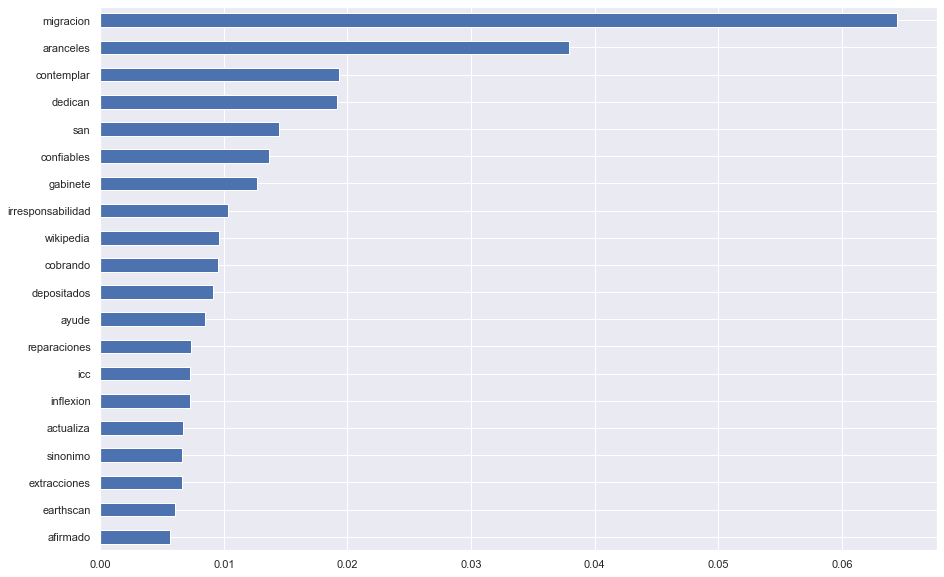

In [176]:
pd.Series(tf_idf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [177]:
y_train_tfidf_predict = tf_idf_model.predict(X_tfid)
y_test_tfidf_predict = tf_idf_model.predict(tfidf.transform(X_test))

In [178]:
print("Precision Score : ",precision_score(y_test, y_test_tfidf_predict, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_test_tfidf_predict, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.9811111111111112
Recall Score :  0.9811111111111112


C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Model Selection

The `RandomizedSearchCV` class is used to perform a randomized search over a hyperparameter space for a given machine learning pipeline.

The `RandomizedSearchCV` object takes several arguments. The first argument, `pipeline`, is the machine learning pipeline that will be optimized. The second argument, `param_grid`, is a dictionary of hyperparameters and their corresponding values that will be searched over. The `n_iter` argument specifies the number of parameter settings that are sampled. In this case, 10 parameter settings will be sampled.

The `scoring` argument is a list of scoring metrics that will be used to evaluate the performance of the machine learning pipeline. In this case, the precision, recall, and F1 score will be used. The `refit` argument specifies which metric to use to choose the best parameters. In this case, the F1 score will be used.

The `cv` argument specifies the number of folds to use for cross-validation. In this case, 10-fold cross-validation will be used. The `return_train_score` argument specifies whether to return the training scores in addition to the test scores. The `verbose` argument specifies the level of verbosity, with a higher value resulting in more output. Finally, the `random_state` argument sets the seed for the random number generator, which ensures that the same results are obtained each time the code is run.

The resulting `RandomizedSearchCV` object can be used to fit the machine learning pipeline to the data and search over the hyperparameter space to find the best combination of hyperparameters that optimize the chosen metric.



In [182]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])

In [183]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100]
}

In [184]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring=["precision", "recall", "f1"], refit="f1", cv=10, return_train_score=True, verbose=1, random_state=5)

In [187]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\juanm\AppData\R

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                                                          'por',
                                                                          'un',
                                                                          'para',
                                                                          'con',
                                                                          'no',
                                                                          'una',
                                                                          'su',
                                                                          'al',
                                                                          'lo',
                                                                          'como',
                                                                          'más',
                                                                          'pero',
                                                                          'sus',
                                                                          'le',
                                                                          'ya',
                                                                          'o',
                                                                          'este',
                                                                          'sí',
                                                                          'porque', ...],
                                                              tokenizer=<function word_tokenize at 0x000002B0784375E0>)),
                                             ('classifier',
                                              RandomForestCl...
                                                                                   'que',
                                                                                   'el',
                                                                                   'en',
                                                                                   'y',
                                                                                   'a',
                                                                                   'los',
                                                                                   'del',
                                                                                   'se',
                                                                                   'las',
                                                                                   'por',
                                                                                   'un',
                                                                                   'para',
                                                                                   'con',
                                                                                 

In [188]:
search.best_params_

{'vectorizer__lowercase': False,
 'vectorizer': CountVectorizer(lowercase=False,
                 stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x000002B0784375E0>),
 'classifier__n_estimators': 100,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [190]:
y_train_search_predict = search.best_estimator_.predict(X_train)
y_test_search_predict = search.best_estimator_.predict(X_test)

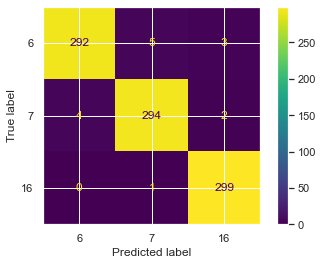

In [196]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_search_predict)

In [195]:
print("Precision Score : ",precision_score(y_test, y_test_search_predict, 
                                           pos_label='positive',
                                           average='weighted'))
print("Recall Score : ",recall_score(y_test, y_test_search_predict, 
                                           pos_label='positive',
                                           average='weighted'))
print("F1:", f1_score(y_test, y_test_search_predict, 
                                           pos_label='positive',
                                           average='weighted'))

Precision Score :  0.983346372688478
Recall Score :  0.9833333333333333
F1: 0.9833106656592145


C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
